1. Import library

In [55]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
from sklearn.metrics import confusion_matrix
import pickle

2. Load dataset

In [56]:
df = pd.read_csv('./train_dataset_extract.csv')
df.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk,fall_adl_bin,person_id
0,0,87.556648,15.213930,231.463658,9.239207,4.672523,26.387364,-25.263541,51.650905,6.244367,...,1.326523,0.301019,2.922709,-1.824055,4.746764,0.531084,0.282050,0.116122,1,P02
1,1,44.318157,8.261864,68.258394,7.558876,4.259279,10.964302,-15.633567,26.597869,3.447825,...,1.043223,0.538801,1.001681,-0.849293,1.850974,0.241984,0.058556,0.087832,1,P02
2,2,74.460722,13.729856,188.508953,5.445488,2.403129,19.384077,-24.037661,43.421739,5.499033,...,1.502900,0.746767,2.007194,-3.394278,5.401472,0.514128,0.264327,0.107849,1,P02
3,3,57.450729,10.513932,110.542765,9.054976,3.497298,24.107342,-20.758716,44.866057,5.344918,...,1.277880,0.496077,2.325320,-1.352276,3.677596,0.477024,0.227552,0.095288,1,P02
4,4,60.583390,13.833995,191.379424,12.447987,5.300773,29.124820,-24.207423,53.332242,6.719094,...,2.685497,0.976436,3.151667,-2.102245,5.253912,0.617530,0.381343,0.119481,1,P02


In [57]:
person_ids = df.pop('person_id').to_numpy()
y_train = df.pop('fall_adl_bin').to_numpy()
X_train = df.drop(df.columns[0], axis=1)
X_train.head()

,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,var_acc_re_jerk,...,std_gyro_re_raw,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk
0,87.556648,15.213930,231.463658,9.239207,4.672523,26.387364,-25.263541,51.650905,6.244367,38.992119,...,1.523491,2.321025,1.326523,0.301019,2.922709,-1.824055,4.746764,0.531084,0.282050,0.116122
1,44.318157,8.261864,68.258394,7.558876,4.259279,10.964302,-15.633567,26.597869,3.447825,11.887499,...,0.956124,0.914173,1.043223,0.538801,1.001681,-0.849293,1.850974,0.241984,0.058556,0.087832
2,74.460722,13.729856,188.508953,5.445488,2.403129,19.384077,-24.037661,43.421739,5.499033,30.239367,...,1.261606,1.591650,1.502900,0.746767,2.007194,-3.394278,5.401472,0.514128,0.264327,0.107849
3,57.450729,10.513932,110.542765,9.054976,3.497298,24.107342,-20.758716,44.866057,5.344918,28.568146,...,1.296869,1.681869,1.277880,0.496077,2.325320,-1.352276,3.677596,0.477024,0.227552,0.095288
4,60.583390,13.833995,191.379424,12.447987,5.300773,29.124820,-24.207423,53.332242,6.719094,45.146224,...,1.609941,2.591911,2.685497,0.976436,3.151667,-2.102245,5.253912,0.617530,0.381343,0.119481


In [58]:
df.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,std_gyro_re_raw,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk
0,0,87.556648,15.213930,231.463658,9.239207,4.672523,26.387364,-25.263541,51.650905,6.244367,...,1.523491,2.321025,1.326523,0.301019,2.922709,-1.824055,4.746764,0.531084,0.282050,0.116122
1,1,44.318157,8.261864,68.258394,7.558876,4.259279,10.964302,-15.633567,26.597869,3.447825,...,0.956124,0.914173,1.043223,0.538801,1.001681,-0.849293,1.850974,0.241984,0.058556,0.087832
2,2,74.460722,13.729856,188.508953,5.445488,2.403129,19.384077,-24.037661,43.421739,5.499033,...,1.261606,1.591650,1.502900,0.746767,2.007194,-3.394278,5.401472,0.514128,0.264327,0.107849
3,3,57.450729,10.513932,110.542765,9.054976,3.497298,24.107342,-20.758716,44.866057,5.344918,...,1.296869,1.681869,1.277880,0.496077,2.325320,-1.352276,3.677596,0.477024,0.227552,0.095288
4,4,60.583390,13.833995,191.379424,12.447987,5.300773,29.124820,-24.207423,53.332242,6.719094,...,1.609941,2.591911,2.685497,0.976436,3.151667,-2.102245,5.253912,0.617530,0.381343,0.119481


In [59]:
def train_and_eval(X_train, y_train, person_ids):
    """
    Perform group k-fold cross-validation with grid search to find the best model.

    Parameters:
    - X_train_val: Feature matrix.
    - y_train_val: Target labels.
    - person_ids: Array-like group labels indicating the `person_id` for each sample.

    Returns:
    - best_model: The best model found during grid search.
    - best_params: The best hyperparameters for the model.
    - best_score: The best F1 score achieved during cross-validation.
    """

    # Define the pipeline with StandardScaler and SVC
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize the data
        ('clf', DecisionTreeClassifier(random_state=1024))  # SVM classifier
    ])

    # Define the parameters for grid search
    tuned_parameters = {'clf__max_features': ['sqrt', 'log2'],
                        'clf__ccp_alpha': [0.1, .01, .001],
                        'clf__max_depth': [5, 6, 7, 8, 9],
                        'clf__criterion': ['gini', 'entropy']
                        }

    # Initialize GroupKFold
    group_kfold = GroupKFold(n_splits=7)
    # Perform grid search with group-based cross-validation
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=tuned_parameters,
        cv=group_kfold.split(X_train, y_train, groups=person_ids),
        scoring='f1',
        verbose=True
    )
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Get the best model
    best_model = grid_search.best_estimator_

    return best_model, best_params, best_score

In [60]:
best_model, best_params, best_score = train_and_eval(X_train, y_train, person_ids)

Fitting 7 folds for each of 60 candidates, totalling 420 fits


In [61]:
print("\nBest model: ", best_model)
print("\nBest Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


Best model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy',
                                        max_depth=5, max_features='sqrt',
                                        random_state=1024))])

Best Hyperparameters: {'clf__ccp_alpha': 0.1, 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': 'sqrt'}
Best Accuracy: 0.9559701048938046


3. Predict

In [62]:
y_train_pred = best_model.predict(X_train)

In [63]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

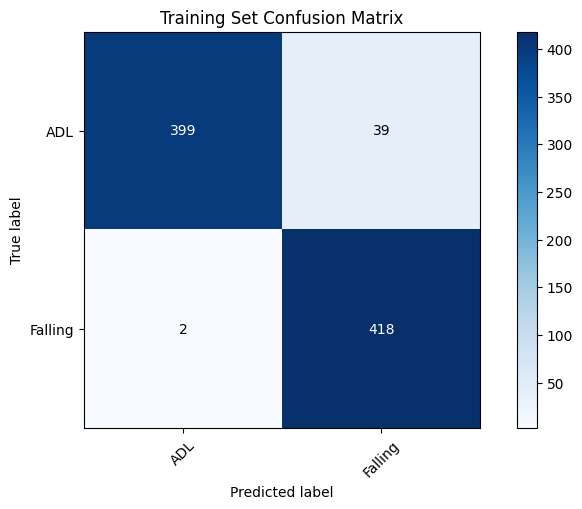

In [64]:
# Plotting
plt.figure(figsize=(15, 5))
label_names = ['ADL', 'Falling']
plt.subplot(1, 2, 1)
plot_confusion_matrix(y_train, y_train_pred, label_names, title='Training Set Confusion Matrix')

4. Dump model

In [66]:
with open('./decision-tree-rf-model', 'wb') as file:
    pickle.dump(best_model, file)